**1) Bibliotecas**

In [1]:
# exibir a versão do python utilizada pelo notebook
!python --version

Python 3.10.12


In [2]:
# biblioteca do python feita para o MongoDB
!python -m pip install -q pymongo[srv]

In [3]:
# biblioteca do python feita para o MySQL
!python -m pip install -q PyMySQL

In [4]:
# biblioteca do python feita para o Pandas Dataframe
!python -m pip install -q pandas

In [5]:
# biblioteca do python feita para o Seaborn
!python -m pip install -q seaborn

In [6]:
import pymongo
from pymongo import MongoClient
import datetime
import time
import json
import os
import pymysql
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
import warnings
warnings.filterwarnings('ignore')

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
pd.set_option('max_colwidth', None)

In [9]:
iteracoes = 200

**2) Conectar Google Drive**

In [10]:
#from google.colab import drive
#drive.mount('/content/drive')

In [11]:
#os.chdir("/content/drive/MyDrive/Databases/Mestrado")

**3) MongoDB Localhost**

**3.1) Conectar com o Banco de Dados**

In [12]:
def ConnectMongoDBClient()->any:
    # uri (uniform resource identifier) defines the connection parameters
    uri = "mongodb://localhost:27017/"
    # start client to connect to MongoDB server
    clientMongoDB = MongoClient(uri)
    return clientMongoDB

In [13]:
clientMongoDB = ConnectMongoDBClient() # Loop
try:
  clientMongoDB.admin.command('ping')
  print("You successfully connected to MongoDB!")
except Exception as e:
  print(e)

You successfully connected to MongoDB!


In [14]:
def DisconnectMongoDBClient(client):
        client.close()

**3.2) Mostrar todas as bases de dados**

In [15]:
print(clientMongoDB.list_database_names())

['admin', 'config', 'local', 'sensores']


**3.3) Criar a base de dados e as collections**

In [16]:
def CreateMongoDatabaseCollections()->any:
    mydb = clientMongoDB['trabalho_parte_1']
    collectionClassificacaoNPS = mydb["ClassificacaoNPS"]
    collectionLocalizacaoTransporte = mydb["LocalizacaoTransporte"]
    collectionPesquisaSatisfacaoCliente = mydb["PesquisaSatisfacaoCliente"]
    return collectionClassificacaoNPS, collectionLocalizacaoTransporte, collectionPesquisaSatisfacaoCliente

In [17]:
collectionClassificacaoNPS, collectionLocalizacaoTransporte, collectionPesquisaSatisfacaoCliente = CreateMongoDatabaseCollections() # Loop

**3.4) Inserir os documentos (Create)**

In [18]:
def ReadJSONFile(jsonfile)->any:
  try:
    with open(jsonfile) as file:
      file_data = json.load(file)    
  except Exception as error:
    print("An exception occurred:", error)
  return file_data

**3.4.1) Insere documentos na collection ClassificacaoNPS**

In [19]:
def insertCollectionClassificacaoNPS(collectionClassificacaoNPS)->any:
    file_data_ClassificacaoNPS = ReadJSONFile('./ClassificacaoNPS.json')
    InsertCollectionClassificacaoNPSStart = time.time()
    collectionClassificacaoNPS.insert_many(file_data_ClassificacaoNPS)
    InsertCollectionClassificacaoNPSEnd = time.time()
    timeDifInsertCollectionClassificacaoNPS = round(InsertCollectionClassificacaoNPSEnd - InsertCollectionClassificacaoNPSStart,3)
    return (timeDifInsertCollectionClassificacaoNPS)

In [20]:
timeDifInsertCollectionClassificacaoNPS = insertCollectionClassificacaoNPS(collectionClassificacaoNPS)  # Loop
print(f"Tempo para inserir na collection ClassificacaoNPS: {timeDifInsertCollectionClassificacaoNPS} segundos")
print("\n")

Tempo para inserir na collection ClassificacaoNPS: 0.012 segundos




**3.4.2) Insere documentos na collection LocalizacaoTransporte**

In [21]:
def insertCollectionLocalizacaoTransporte(collectionLocalizacaoTransporte)->any:
    file_data_LocalizacaoTransporte = ReadJSONFile('./LocalizacaoTransporte.json')
    InsertCollectionLocalizacaoTransporteStart = time.time()
    collectionLocalizacaoTransporte.insert_many(file_data_LocalizacaoTransporte)
    InsertCollectionLocalizacaoTransporteEnd = time.time()
    timeDifInsertCollectionLocalizacaoTransporte = round(InsertCollectionLocalizacaoTransporteEnd - InsertCollectionLocalizacaoTransporteStart,3)
    return (timeDifInsertCollectionLocalizacaoTransporte)

In [22]:
timeDifInsertCollectionLocalizacaoTransporte = insertCollectionLocalizacaoTransporte(collectionLocalizacaoTransporte)  # Loop
print(f"Tempo para inserir na collection LocalizacaoTransporte: {timeDifInsertCollectionLocalizacaoTransporte} segundos")
print("\n")

Tempo para inserir na collection LocalizacaoTransporte: 0.017 segundos




**3.4.3) Insere documentos na collection PesquisaSatisfacaoCliente**

In [23]:
def insertCollectionPesquisaSatisfacaoCliente(collectionPesquisaSatisfacaoCliente)->any:
    file_data_PesquisaSatisfacaoCliente = ReadJSONFile('./PesquisaSatisfacaoCliente.json')
    InsertCollectionPesquisaSatisfacaoClienteStart = time.time()
    collectionPesquisaSatisfacaoCliente.insert_many(file_data_PesquisaSatisfacaoCliente)
    InsertCollectionPesquisaSatisfacaoClienteEnd = time.time()
    timeDifInsertCollectionPesquisaSatisfacaoCliente = round(InsertCollectionPesquisaSatisfacaoClienteEnd - InsertCollectionPesquisaSatisfacaoClienteStart,3)
    return (timeDifInsertCollectionPesquisaSatisfacaoCliente)

In [24]:
timeDifInsertCollectionPesquisaSatisfacaoCliente = insertCollectionPesquisaSatisfacaoCliente(collectionPesquisaSatisfacaoCliente)  # Loop
print(f"Tempo para inserir na collection PesquisaSatisfacaoCliente: {timeDifInsertCollectionPesquisaSatisfacaoCliente} segundos")
print("\n")

Tempo para inserir na collection PesquisaSatisfacaoCliente: 0.019 segundos




**3.4.4) Tempo total de inserção nas collections**

In [25]:
totalTimeInsertMongo = timeDifInsertCollectionClassificacaoNPS + timeDifInsertCollectionLocalizacaoTransporte + timeDifInsertCollectionPesquisaSatisfacaoCliente
print(f"Tempo total para inserir nas collections do MongoDB:: {round(totalTimeInsertMongo,3)} segundos")
print("\n")

Tempo total para inserir nas collections do MongoDB:: 0.048 segundos




**3.5) Listar os documentos (Read)**

**3.5.1) Converter os campos de data de string para ISODate**

In [26]:
def UpdateToISODateCollection(collection)->None:
  collection.update_many(
      {},
      [
          {"$set": {"datahora": {"$dateFromString": {"dateString": "$datahora"}}}}
      ]
  )

In [27]:
UpdateToISODateCollection(collectionLocalizacaoTransporte) # Loop

In [28]:
UpdateToISODateCollection(collectionPesquisaSatisfacaoCliente) # Loop

**3.5.1) Criar indices para os campos de pesquisa**

In [29]:
# def CriarIndiceMongoDB(collection, campo)->any:        
#     resp = collection.create_index([(campo, 1)])
#     return resp

In [30]:
# indexLocalizacaoTransporteEmpresa = CriarIndiceMongoDB(collectionLocalizacaoTransporte,"empresa") # Loop
# try:
#     print ("index response:", indexLocalizacaoTransporteEmpresa)
# except Exception as e:
#     print(e)

In [31]:
# indexLocalizacaoTransporteLinha = CriarIndiceMongoDB(collectionLocalizacaoTransporte,"linha") # Loop
# try:
#     print ("index response:", indexLocalizacaoTransporteLinha)
# except Exception as e:
#     print(e)

In [32]:
# indexLocalizacaoTransporteDatahora = CriarIndiceMongoDB(collectionLocalizacaoTransporte,"datahora") # Loop
# try:
#     print ("index response:", indexLocalizacaoTransporteDatahora)
# except Exception as e:
#     print(e)

In [33]:
# indexPesquisaSatisfacaoClienteEmpresa = CriarIndiceMongoDB(collectionPesquisaSatisfacaoCliente,"empresa") # Loop
# try:
#     print ("index response:", indexPesquisaSatisfacaoClienteEmpresa)
# except Exception as e:
#     print(e)

In [34]:
# indexPesquisaSatisfacaoClienteNota = CriarIndiceMongoDB(collectionPesquisaSatisfacaoCliente,"nota") # Loop
# try:
#     print ("index response:", indexPesquisaSatisfacaoClienteNota)
# except Exception as e:
#     print(e)

**3.5.2) Listar todos os documentos da coleção (Lookup PesquisaSatisfacaoCliente e ClassificacaoNPS)**

In [35]:
def FindOnCollection(collection, isLookup)->None:
        FindOnCollectionStart = time.time()
        if isLookup and collection.name == "PesquisaSatisfacaoCliente":
            result = collection.aggregate([{'$lookup': {'from': 'ClassificacaoNPS', 'localField': 'nota', 'foreignField': 'nota', 'as': 'classificacaoNPS'}}])
        else:
            result = collection.find()
        if collection.name == "LocalizacaoTransporte" and result:
            for doc in result:
                _id = doc['_id']
                empresa = doc['empresa']
                linha = doc['linha']
                latitude = doc['latitude']
                longitude = doc['longitude']
                datahora = doc['datahora']
                print(f" id: {_id}\n empresa: {empresa}\n linha: {linha}\n latitude: {latitude}\n longitude: {longitude}\n datahora: {datahora}\n")
        elif collection.name == "PesquisaSatisfacaoCliente" and result:
            for doc in result:
                _id = doc['_id']
                empresa = doc['empresa']
                linha = doc['linha']
                nota = doc['nota']
                if isLookup:
                    classificacao = '(' + doc['classificacaoNPS'][0]['classificacao'] + ')'
                else:
                    classificacao = ""
                datahora = doc['datahora']
                print(f" id: {_id}\n empresa: {empresa}\n linha: {linha}\n nota: {nota} {classificacao}\n datahora: {datahora}\n")
        else:
            print("No documents found.")
            print("\n")
        FindOnCollectionEnd = time.time()
        print(f"Tempo de busca na colleção: {round(FindOnCollectionEnd - FindOnCollectionStart,4)} segundos")

In [36]:
#FindOnCollection(collectionPesquisaSatisfacaoCliente,True)

**3.5.3) Questão 1 - Qual é a localização do transporte de interesse em tempo real?**

In [37]:
def Question1MongoDB(collection, empresa, linha, datahora)->float:        
        d = datetime.datetime.strptime(datahora, "%Y-%m-%dT%H:%M:%S.%fZ")
        Question1Start = time.time()
        doc = collection.find_one({"empresa": empresa, "linha": linha, "datahora": d})        
        Question1End = time.time()
        timeDif = round(Question1End - Question1Start,3)        
        return timeDif, doc

In [38]:
timeDifQuestion1Mongo, doc = Question1MongoDB(collectionLocalizacaoTransporte, "Viação Bonança", "São Vicente / Bandeirantes", "2023-10-18T01:39:37.316Z") # Loop
print("<<< Questão 1 >>> Qual é a localização do transporte de interesse em tempo real?")
if doc is not None:
    empresa = doc['empresa']
    linha = doc['linha']
    latitude = doc['latitude']
    longitude = doc['longitude']
    datahora = doc['datahora']
    print(f"Empresa: {empresa}\nLinha: {linha}\nLatitude: {latitude}\nLongitude: {longitude}\nData/Hora: {datahora}")
else:
    print("No documents found.")
print(f"Tempo da Questão 1: {timeDifQuestion1Mongo} segundos")
print("\n")

<<< Questão 1 >>> Qual é a localização do transporte de interesse em tempo real?
Empresa: Viação Bonança
Linha: São Vicente / Bandeirantes
Latitude: -6.4071
Longitude: 94.4551
Data/Hora: 2023-10-18 01:39:37.316000
Tempo da Questão 1: 0.001 segundos




**3.5.4) Questão 2 - Qual linha teve sua localização mais compartilhada?**

In [39]:
def Question2MongoDB(collection)->float:
        Question2Start = time.time()
        result_cursor = collection.aggregate([{"$group":{"_id":"$linha","count":{"$sum":1}}},{"$sort":{"count":-1}},{"$limit":1}])        
        Question2End = time.time()
        timeDif = round(Question2End - Question2Start,2)        
        return timeDif, result_cursor

In [40]:
timeDifQuestion2Mongo, result_cursor = Question2MongoDB(collectionLocalizacaoTransporte) # Loop
print("<<< Questão 2 >>> Qual linha teve sua localização mais compartilhada?")
if result_cursor is not None:
    print(f"A linha que teve sua localização mais compartilhada foi:")
    for doc in result_cursor:
        print(doc)
else:
    print("No documents found.")
print(f"Tempo da Questão 2: {timeDifQuestion2Mongo} segundos")
print("\n")

<<< Questão 2 >>> Qual linha teve sua localização mais compartilhada?
A linha que teve sua localização mais compartilhada foi:
{'_id': 'Primavera / Isabel Tavares', 'count': 95}
Tempo da Questão 2: 0.0 segundos




**3.5.5) Questão 3 - Qual empresa teve a localização de seus ônibus mais compartilhada?**

In [41]:
def Question3MongoDB(collection)->float:
    Question3Start = time.time()
    result_cursor = collection.aggregate([{"$group":{"_id":"$empresa","count":{"$sum":1}}},{"$sort":{"count":-1}},{"$limit":1}])    
    Question3End = time.time()
    timeDif = round(Question3End - Question3Start,3)    
    return timeDif, result_cursor

In [42]:
timeDifQuestion3Mongo, result_cursor = Question3MongoDB(collectionLocalizacaoTransporte) # Loop
print("<<< Questão 3 >>> Qual empresa teve a localização de seus ônibus mais compartilhada?")
if result_cursor is not None:
    print(f"A empresa que teve sua localização mais compartilhada foi:")
    for doc in result_cursor:
        print(doc)
else:
    print("No documents found.")
print(f"Tempo da Questão 3: {timeDifQuestion3Mongo} segundos")
print("\n")

<<< Questão 3 >>> Qual empresa teve a localização de seus ônibus mais compartilhada?
A empresa que teve sua localização mais compartilhada foi:
{'_id': 'T.C.L. - Transportes Coletivos Léo', 'count': 511}
Tempo da Questão 3: 0.003 segundos




**3.5.6) Questão 4 - Qual horário concentrou o maior volume de compartilhamentos?**

---



In [43]:
def Question4MongoDB(collection)->float:
        Question4Start = time.time()
        result_cursor = collection.aggregate([{"$project":{"hour":{"$hour":"$datahora"}}},{"$group":{"_id":"$hour","count":{"$sum":1}}},{"$sort":{"count":-1}},{"$limit":1}])        
        Question4End = time.time()
        timeDif = round(Question4End - Question4Start,3)
        return timeDif, result_cursor

In [44]:
timeDifQuestion4Mongo, result_cursor = Question4MongoDB(collectionLocalizacaoTransporte) # Loop
print("<<< Questão 4 >>> Qual horário concentrou o maior volume de compartilhamentos?")
if result_cursor is not None:
    print(f"O horário que concentrou o maior volume de compartilhamentos foi:")
    for doc in result_cursor:
        print(doc)
else:
    print("No documents found.")
print(f"Tempo da Questão 4: {timeDifQuestion4Mongo} segundos")
print("\n")

<<< Questão 4 >>> Qual horário concentrou o maior volume de compartilhamentos?
O horário que concentrou o maior volume de compartilhamentos foi:
{'_id': 19, 'count': 53}
Tempo da Questão 4: 0.003 segundos




**3.5.7) Questão 5 - Qual empresa obteve o maior total de pontos na pesquisa de satisfação de seus clientes?**

In [45]:
def Question5MongoDB(collection)->float:
        Question5Start = time.time()
        result_cursor = collection.aggregate([{"$group":{"_id":"$empresa","totalNota":{"$sum":"$nota"}}},{"$sort":{"totalNota":-1}},{"$limit":1}])        
        Question5End = time.time()
        timeDif = round(Question5End - Question5Start,3)        
        return timeDif, result_cursor

In [46]:
timeDifQuestion5Mongo, result_cursor = Question5MongoDB(collectionPesquisaSatisfacaoCliente) # Loop
print("<<< Questão 5 >>> Qual empresa obteve o maior total de pontos na pesquisa de satisfação de seus clientes?")
if result_cursor is not None:
    print(f"A empresa que obteve o maior total de pontos foi:")
    for doc in result_cursor:
        print(doc)
else:
    print("No documents found.")
print(f"Tempo da Questão 5: {timeDifQuestion5Mongo} segundos")
print("\n")    

<<< Questão 5 >>> Qual empresa obteve o maior total de pontos na pesquisa de satisfação de seus clientes?
A empresa que obteve o maior total de pontos foi:
{'_id': 'T.C.L. - Transportes Coletivos Léo', 'totalNota': 2953}
Tempo da Questão 5: 0.002 segundos




**3.5.8) Tempo total de leitura das collections**

In [47]:
totalTimeFindMongo = timeDifQuestion1Mongo + timeDifQuestion2Mongo + timeDifQuestion3Mongo + timeDifQuestion4Mongo + timeDifQuestion5Mongo
print(f"Tempo total para leitura das Questões no MongoDB: {round(totalTimeFindMongo,3)} segundos")
print("\n")

Tempo total para leitura das Questões no MongoDB: 0.009 segundos




**3.6) Atualizar os documentos (Update)**

In [48]:
def UpdateCollection(collection)->None:
        collection.update_many(
          {"empresa": "Sereno Tur" },
              {
                  "$set": { "empresa" : "Viação Bonança" }
              }
        )

**3.6.1) Atualiza documentos na collection LocalizacaoTransporte**

In [49]:
def updateCollectionLocalizacaoTransporte(collectionLocalizacaoTransporte)->any:
    UpdateCollectionLocalizacaoTransporteStart = time.time()
    UpdateCollection(collectionLocalizacaoTransporte)
    UpdateCollectionLocalizacaoTransporteEnd = time.time()
    timeDifUpdateCollectionLocalizacaoTransporte = round(UpdateCollectionLocalizacaoTransporteEnd - UpdateCollectionLocalizacaoTransporteStart,3)    
    return timeDifUpdateCollectionLocalizacaoTransporte

In [50]:
timeDifUpdateCollectionLocalizacaoTransporte = updateCollectionLocalizacaoTransporte(collectionLocalizacaoTransporte) # Loop
print(f"Tempo para atualizar a collection LocalizacaoTransporte: {timeDifUpdateCollectionLocalizacaoTransporte} segundos")
print("\n")

Tempo para atualizar a collection LocalizacaoTransporte: 0.003 segundos




**3.6.2) Atualiza documentos na collection PesquisaSatisfacaoCliente**

In [51]:
def updateCollectionPesquisaSatisfacaoCliente(collectionPesquisaSatisfacaoCliente)->any:
    UpdateCollectionPesquisaSatisfacaoClienteStart = time.time()
    UpdateCollection(collectionPesquisaSatisfacaoCliente)
    UpdateCollectionPesquisaSatisfacaoClienteEnd = time.time()
    timeDifUpdateCollectionPesquisaSatisfacaoCliente = round(UpdateCollectionPesquisaSatisfacaoClienteEnd - UpdateCollectionPesquisaSatisfacaoClienteStart,3)
    return timeDifUpdateCollectionPesquisaSatisfacaoCliente

In [52]:
timeDifUpdateCollectionPesquisaSatisfacaoCliente = updateCollectionPesquisaSatisfacaoCliente(collectionPesquisaSatisfacaoCliente) # Loop
print(f"Tempo para atualizar a collection PesquisaSatisfacaoCliente: {timeDifUpdateCollectionPesquisaSatisfacaoCliente} segundos")
print("\n")

Tempo para atualizar a collection PesquisaSatisfacaoCliente: 0.003 segundos




**3.6.3) Tempo total de atualização das collections**

In [53]:
totalTimeUpdateMongo = timeDifUpdateCollectionLocalizacaoTransporte + timeDifUpdateCollectionPesquisaSatisfacaoCliente
print(f"Tempo total para atualização das collections no MongoDB: {round(totalTimeUpdateMongo,3)} segundos")
print("\n")

Tempo total para atualização das collections no MongoDB: 0.006 segundos




**3.7) Deletar os documentos (Delete)**

In [54]:
def DeleteDocumentsCollection(collection)->None:
        collection.delete_many({})
        collection.drop()

**3.7.1) Deleta documentos na collection ClassificacaoNPS**

In [55]:
def deleteCollectionClassificacaoNPSS(collectionClassificacaoNPS)->any:
    DeleteCollectionClassificacaoNPSStart = time.time()
    DeleteDocumentsCollection(collectionClassificacaoNPS)
    DeleteCollectionClassificacaoNPSEnd = time.time()
    timeDifDeleteCollectionClassificacaoNPS = round(DeleteCollectionClassificacaoNPSEnd - DeleteCollectionClassificacaoNPSStart,3)
    return timeDifDeleteCollectionClassificacaoNPS

In [56]:
timeDifDeleteCollectionClassificacaoNPS = deleteCollectionClassificacaoNPSS(collectionClassificacaoNPS) # Loop
print(f"Tempo para excluir na collection ClassificacaoNPS: {timeDifDeleteCollectionClassificacaoNPS} segundos")
print("\n")

Tempo para excluir na collection ClassificacaoNPS: 0.002 segundos




**3.7.2) Deleta documentos na collection LocalizacaoTransporte**

In [57]:
def deleteCollectionLocalizacaoTransporte(collectionLocalizacaoTransporte)->any:
    DeleteCollectionLocalizacaoTransporteStart = time.time()
    DeleteDocumentsCollection(collectionLocalizacaoTransporte)
    DeleteCollectionLocalizacaoTransporteEnd = time.time()
    timeDifDeleteCollectionLocalizacaoTransporte = round(DeleteCollectionLocalizacaoTransporteEnd - DeleteCollectionLocalizacaoTransporteStart,3)
    return timeDifDeleteCollectionLocalizacaoTransporte

In [58]:
timeDifDeleteCollectionLocalizacaoTransporte = deleteCollectionLocalizacaoTransporte(collectionLocalizacaoTransporte) # Loop
print(f"Tempo para excluir na collection LocalizacaoTransporte: {timeDifDeleteCollectionLocalizacaoTransporte} segundos")
print("\n")

Tempo para excluir na collection LocalizacaoTransporte: 0.008 segundos




**3.7.3) Deleta documentos na collection PesquisaSatisfacaoCliente**

In [59]:
def deleteCollectionPesquisaSatisfacaoCliente(collectionPesquisaSatisfacaoCliente)->any:
    DeleteCollectionPesquisaSatisfacaoClienteStart = time.time()
    DeleteDocumentsCollection(collectionPesquisaSatisfacaoCliente)
    DeleteCollectionPesquisaSatisfacaoClienteEnd = time.time()
    timeDifDeleteCollectionPesquisaSatisfacaoCliente = round(DeleteCollectionPesquisaSatisfacaoClienteEnd - DeleteCollectionPesquisaSatisfacaoClienteStart,3)
    return timeDifDeleteCollectionPesquisaSatisfacaoCliente

In [60]:
timeDifDeleteCollectionPesquisaSatisfacaoCliente = deleteCollectionPesquisaSatisfacaoCliente(collectionPesquisaSatisfacaoCliente) # Loop
print(f"Tempo para excluir na collection PesquisaSatisfacaoCliente: {timeDifDeleteCollectionPesquisaSatisfacaoCliente} segundos")
print("\n")

Tempo para excluir na collection PesquisaSatisfacaoCliente: 0.009 segundos




**3.7.4) Tempo total de exclusão nas collections**

In [61]:
totalTimeDeleteMongo = timeDifDeleteCollectionClassificacaoNPS + timeDifDeleteCollectionLocalizacaoTransporte + timeDifDeleteCollectionPesquisaSatisfacaoCliente
print(f"Tempo total para exclusão dos documentos no MongoDB: {round(totalTimeDeleteMongo,3)} segundos")
print("\n")

Tempo total para exclusão dos documentos no MongoDB: 0.019 segundos




**3.8) Desconectar do Banco de Dados**

In [62]:
DisconnectMongoDBClient(clientMongoDB) # Loop

**3.9) Performance do MongoDB**

In [63]:
clientMongoDB = ConnectMongoDBClient();
collectionClassificacaoNPS, collectionLocalizacaoTransporte, collectionPesquisaSatisfacaoCliente = CreateMongoDatabaseCollections()

In [64]:
def stressTestMongoDB(iteracoes)->any:
    listTotalTimeInsertMongo = []
    listTotalTimeFindMongo = []
    listTotalTimeUpdateMongo = []
    listTotalTimeDeleteMongo = []
    try:
        for i in range(iteracoes):         
            # MongoDB Create
            timeDifInsertCollectionClassificacaoNPS = insertCollectionClassificacaoNPS(collectionClassificacaoNPS)  # Loop
            timeDifInsertCollectionLocalizacaoTransporte = insertCollectionLocalizacaoTransporte(collectionLocalizacaoTransporte)  # Loop
            timeDifInsertCollectionPesquisaSatisfacaoCliente = insertCollectionPesquisaSatisfacaoCliente(collectionPesquisaSatisfacaoCliente)  # Loop    
            totalTimeInsertMongo = timeDifInsertCollectionClassificacaoNPS + timeDifInsertCollectionLocalizacaoTransporte + timeDifInsertCollectionPesquisaSatisfacaoCliente        
            listTotalTimeInsertMongo.append(round(totalTimeInsertMongo,3))
            # MongoDB Read
            UpdateToISODateCollection(collectionLocalizacaoTransporte) # Loop
            UpdateToISODateCollection(collectionPesquisaSatisfacaoCliente) # Loop
            #CriarIndiceMongoDB(collectionLocalizacaoTransporte,"empresa") # Loop
            #CriarIndiceMongoDB(collectionLocalizacaoTransporte,"linha") # Loop
            #CriarIndiceMongoDB(collectionLocalizacaoTransporte,"datahora") # Loop
            #CriarIndiceMongoDB(collectionPesquisaSatisfacaoCliente,"empresa") # Loop
            #CriarIndiceMongoDB(collectionPesquisaSatisfacaoCliente,"nota") # Loop
            timeDifQuestion1Mongo, doc = Question1MongoDB(collectionLocalizacaoTransporte, "Viação Bonança", "São Vicente / Bandeirantes", "2023-10-18T01:39:37.316Z") # Loop
            timeDifQuestion2Mongo, result_cursor = Question2MongoDB(collectionLocalizacaoTransporte) # Loop
            timeDifQuestion3Mongo, result_cursor = Question3MongoDB(collectionLocalizacaoTransporte) # Loop
            timeDifQuestion4Mongo, result_cursor = Question4MongoDB(collectionLocalizacaoTransporte) # Loop
            timeDifQuestion5Mongo, result_cursor = Question5MongoDB(collectionPesquisaSatisfacaoCliente) # Loop
            totalTimeFindMongo = timeDifQuestion1Mongo + timeDifQuestion2Mongo + timeDifQuestion3Mongo + timeDifQuestion4Mongo + timeDifQuestion5Mongo
            listTotalTimeFindMongo.append(round(totalTimeFindMongo,3))
            # MongoDB Update
            timeDifUpdateCollectionLocalizacaoTransporte = updateCollectionLocalizacaoTransporte(collectionLocalizacaoTransporte) # Loop
            timeDifUpdateCollectionPesquisaSatisfacaoCliente = updateCollectionPesquisaSatisfacaoCliente(collectionPesquisaSatisfacaoCliente) # Loop
            totalTimeUpdateMongo = timeDifUpdateCollectionLocalizacaoTransporte + timeDifUpdateCollectionPesquisaSatisfacaoCliente
            listTotalTimeUpdateMongo.append(round(totalTimeUpdateMongo,3))
            # MongoDB Delete
            timeDifDeleteCollectionClassificacaoNPS = deleteCollectionClassificacaoNPSS(collectionClassificacaoNPS) # Loop
            timeDifDeleteCollectionLocalizacaoTransporte = deleteCollectionLocalizacaoTransporte(collectionLocalizacaoTransporte) # Loop
            timeDifDeleteCollectionPesquisaSatisfacaoCliente = deleteCollectionPesquisaSatisfacaoCliente(collectionPesquisaSatisfacaoCliente) # Loop
            totalTimeDeleteMongo = timeDifDeleteCollectionClassificacaoNPS + timeDifDeleteCollectionLocalizacaoTransporte + timeDifDeleteCollectionPesquisaSatisfacaoCliente
            listTotalTimeDeleteMongo.append(round(totalTimeDeleteMongo,3))
        print (*listTotalTimeInsertMongo, sep=",")
    except Exception as e:
        print(e)
    return listTotalTimeInsertMongo, listTotalTimeFindMongo, listTotalTimeUpdateMongo, listTotalTimeDeleteMongo

In [65]:
listTotalTimeInsertMongo, listTotalTimeFindMongo, listTotalTimeUpdateMongo, listTotalTimeDeleteMongo = stressTestMongoDB(iteracoes)

0.046,0.05,0.043,0.052,0.043,0.037,0.046,0.035,0.046,0.05,0.044,0.043,0.066,0.042,0.032,0.033,0.032,0.032,0.053,0.059,0.053,0.052,0.056,0.036,0.036,0.032,0.032,0.042,0.044,0.042,0.041,0.045,0.042,0.035,0.07,0.05,0.041,0.041,0.046,0.064,0.043,0.039,0.055,0.045,0.044,0.032,0.034,0.038,0.038,0.036,0.033,0.034,0.034,0.043,0.05,0.044,0.04,0.039,0.039,0.037,0.032,0.037,0.038,0.039,0.032,0.038,0.039,0.083,0.036,0.045,0.043,0.036,0.034,0.045,0.061,0.079,0.047,0.054,0.042,0.04,0.038,0.039,0.035,0.035,0.032,0.035,0.033,0.034,0.037,0.032,0.031,0.031,0.032,0.04,0.037,0.037,0.033,0.039,0.036,0.043,0.037,0.031,0.036,0.04,0.046,0.038,0.038,0.032,0.035,0.037,0.031,0.032,0.045,0.032,0.038,0.036,0.04,0.04,0.041,0.046,0.041,0.047,0.036,0.032,0.031,0.044,0.032,0.034,0.032,0.032,0.032,0.032,0.033,0.036,0.038,0.033,0.036,0.039,0.035,0.034,0.034,0.036,0.103,0.038,0.039,0.032,0.033,0.033,0.032,0.033,0.033,0.036,0.034,0.037,0.054,0.038,0.038,0.037,0.038,0.04,0.042,0.045,0.041,0.048,0.055,0.038,0.032,0.033,0.03

In [66]:
DisconnectMongoDBClient(clientMongoDB)

In [67]:
#Tempo total de inserção nas collections
print(f"Tempos totais em segundos para inserir nas collections do MongoDB")
print (listTotalTimeInsertMongo)
print("\n")

Tempos totais em segundos para inserir nas collections do MongoDB
[0.046, 0.05, 0.043, 0.052, 0.043, 0.037, 0.046, 0.035, 0.046, 0.05, 0.044, 0.043, 0.066, 0.042, 0.032, 0.033, 0.032, 0.032, 0.053, 0.059, 0.053, 0.052, 0.056, 0.036, 0.036, 0.032, 0.032, 0.042, 0.044, 0.042, 0.041, 0.045, 0.042, 0.035, 0.07, 0.05, 0.041, 0.041, 0.046, 0.064, 0.043, 0.039, 0.055, 0.045, 0.044, 0.032, 0.034, 0.038, 0.038, 0.036, 0.033, 0.034, 0.034, 0.043, 0.05, 0.044, 0.04, 0.039, 0.039, 0.037, 0.032, 0.037, 0.038, 0.039, 0.032, 0.038, 0.039, 0.083, 0.036, 0.045, 0.043, 0.036, 0.034, 0.045, 0.061, 0.079, 0.047, 0.054, 0.042, 0.04, 0.038, 0.039, 0.035, 0.035, 0.032, 0.035, 0.033, 0.034, 0.037, 0.032, 0.031, 0.031, 0.032, 0.04, 0.037, 0.037, 0.033, 0.039, 0.036, 0.043, 0.037, 0.031, 0.036, 0.04, 0.046, 0.038, 0.038, 0.032, 0.035, 0.037, 0.031, 0.032, 0.045, 0.032, 0.038, 0.036, 0.04, 0.04, 0.041, 0.046, 0.041, 0.047, 0.036, 0.032, 0.031, 0.044, 0.032, 0.034, 0.032, 0.032, 0.032, 0.032, 0.033, 0.036, 0.038,

In [68]:
#Tempo total de leitura das collections
print(f"Tempos totais em segundos para leitura das Questões no MongoDB")
print (*listTotalTimeFindMongo, sep=",")
print("\n")

Tempos totais em segundos para leitura das Questões no MongoDB
0.006,0.008,0.005,0.005,0.005,0.006,0.004,0.008,0.008,0.005,0.004,0.004,0.004,0.004,0.005,0.004,0.004,0.004,0.01,0.01,0.011,0.013,0.005,0.005,0.004,0.004,0.006,0.005,0.007,0.005,0.007,0.006,0.004,0.004,0.005,0.005,0.005,0.005,0.006,0.005,0.005,0.006,0.005,0.005,0.004,0.005,0.005,0.005,0.004,0.004,0.004,0.004,0.009,0.005,0.005,0.006,0.005,0.005,0.006,0.004,0.004,0.004,0.005,0.004,0.004,0.006,0.004,0.005,0.004,0.005,0.004,0.004,0.004,0.004,0.004,0.005,0.008,0.005,0.005,0.005,0.005,0.004,0.005,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.005,0.005,0.004,0.005,0.005,0.004,0.004,0.004,0.004,0.005,0.004,0.006,0.005,0.004,0.004,0.004,0.004,0.005,0.004,0.004,0.006,0.005,0.005,0.006,0.005,0.007,0.005,0.005,0.005,0.004,0.004,0.004,0.004,0.005,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.005,0.004,0.004,0.004,0.004,0.004,0.004,0.005,0.005,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.007,0.005,0.004,0.0

In [69]:
#Tempo total de atualização das collections
print(f"Tempos totais em segundos para atualização das collections no MongoDB")
print (*listTotalTimeUpdateMongo, sep=",")
print("\n")

Tempos totais em segundos para atualização das collections no MongoDB
0.006,0.006,0.006,0.006,0.005,0.007,0.004,0.011,0.006,0.006,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.008,0.007,0.009,0.011,0.005,0.004,0.004,0.004,0.006,0.005,0.006,0.006,0.006,0.006,0.004,0.004,0.006,0.006,0.006,0.006,0.006,0.006,0.005,0.007,0.006,0.006,0.004,0.007,0.005,0.004,0.004,0.004,0.004,0.004,0.006,0.006,0.006,0.006,0.005,0.006,0.006,0.004,0.004,0.005,0.006,0.004,0.004,0.005,0.004,0.004,0.004,0.005,0.004,0.004,0.004,0.004,0.004,0.021,0.007,0.005,0.006,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.005,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.005,0.005,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.006,0.005,0.004,0.006,0.006,0.007,0.005,0.006,0.004,0.004,0.004,0.004,0.004,0.005,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.005,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.005,0.006,

In [70]:
#Tempo total de exclusão das collections
print(f"Tempos totais em segundos para exclusão dos documentos no MongoDB")
print (*listTotalTimeDeleteMongo, sep=",")
print("\n")

Tempos totais em segundos para exclusão dos documentos no MongoDB
0.018,0.019,0.018,0.018,0.014,0.019,0.012,0.023,0.019,0.018,0.012,0.011,0.011,0.011,0.011,0.011,0.011,0.011,0.022,0.024,0.02,0.035,0.013,0.011,0.011,0.012,0.017,0.018,0.017,0.018,0.018,0.018,0.011,0.011,0.019,0.016,0.019,0.016,0.022,0.017,0.016,0.024,0.016,0.016,0.011,0.019,0.015,0.014,0.011,0.011,0.011,0.011,0.017,0.018,0.019,0.017,0.015,0.015,0.017,0.011,0.011,0.014,0.015,0.011,0.015,0.015,0.011,0.013,0.011,0.017,0.012,0.011,0.014,0.012,0.012,0.063,0.019,0.015,0.018,0.015,0.015,0.012,0.013,0.011,0.011,0.011,0.011,0.012,0.011,0.011,0.011,0.011,0.013,0.015,0.014,0.011,0.013,0.013,0.014,0.013,0.011,0.011,0.013,0.014,0.015,0.014,0.011,0.011,0.012,0.011,0.013,0.011,0.011,0.014,0.014,0.014,0.016,0.016,0.022,0.015,0.018,0.014,0.011,0.011,0.011,0.011,0.014,0.011,0.011,0.012,0.013,0.012,0.011,0.013,0.011,0.015,0.011,0.011,0.011,0.011,0.013,0.011,0.015,0.017,0.012,0.011,0.011,0.011,0.011,0.011,0.012,0.011,0.012,0.016,0.016,0.015

**4) MySQL Localhost**

**4.1) Conectar com o Banco de Dados**

In [71]:
def CreateMySQLClient(_host, _user, _password, _bd)->pymysql:
    # Create a new client and connect to the server
    client = pymysql.connect(
        host=_host,
        user=_user,
        password=_password,
        db=_bd,
        charset="utf8"
        )
    return client

In [72]:
host="localhost"
user="root"
password="linux-00"
bd="projeto_mestrado"

clientMySQL = CreateMySQLClient(host, user, password, bd) # Loop
# Send a ping to confirm a successful connection
try:
    if (clientMySQL.open):
        print("You successfully connected to MySQL!")
    else:
        print("Not connected to MySQL")
except Exception as e:
    print(e)
cursorMySQL = clientMySQL.cursor() # Loop

You successfully connected to MySQL!


In [73]:
def DisconnectMySQLClient (client, cursor):
        cursor.close()
        client.close()

**4.2) Mostrar todas as bases de dados**

In [74]:
def MostrarBases(cursor)->None:
        cursor.execute("""show databases
                       """)
        for value in cursor:
            print(value)
        print("\n")

In [75]:
MostrarBases(cursorMySQL)

('exercicios_em_aula',)
('information_schema',)
('mysql',)
('performance_schema',)
('projeto_mestrado',)
('sys',)




**4.3) Escolher a base de dados**

In [76]:
def EscolherBD(cursor)->None:
        cursor.execute("""use projeto_mestrado
                       """)

In [77]:
EscolherBD(cursorMySQL) # Loop

**4.4) Mostrar todas as tabelas da base de dados**

In [78]:
def MostrarTabelas(cursor)->None:
        cursor.execute("""show tables
                       """)
        for value in cursor:
            print(value)
        print("\n")

In [79]:
MostrarTabelas(cursorMySQL)

**4.5) Preparar a base de dados**

**4.5.1) Carregar o modelo físico da base de dados**

In [80]:
MySQL_DDL_File = open("./MySQL-DDL", "r")
scriptDDL = MySQL_DDL_File.read()
MySQL_DDL_File.close()

In [81]:
scriptDDL_list = scriptDDL.replace("\n","").split(";")
scriptDDL_list = scriptDDL_list[:-1]

**4.5.2) Aplicar o modelo físico na base de dados**

In [82]:
def ExecutarScriptDDL(client, cursor, scriptDDL)->None:
      for script in scriptDDL:
        cursor.execute(script)
      client.commit()

In [83]:
ExecutarScriptDDL(clientMySQL,cursorMySQL,scriptDDL_list)

In [84]:
MostrarTabelas(cursorMySQL)

('ClassificacaoNPS',)
('Empresa',)
('Linha',)
('PesquisaSatisfacao',)
('Posicao',)




**4.5.3) Gerar DML de inserção para as tabelas**

**4.5.3.1) Script de inserção de dados na tabela ClassificacaoNPS**

In [85]:
df_ClassificacaoNPS = pd.read_json("./ClassificacaoNPS.json")

In [86]:
df_ClassificacaoNPS.head(5)

,nota,classificacao
0,4,Detrator
1,8,Neutro
2,0,Detrator
3,2,Detrator
4,1,Detrator


In [87]:
df_ClassificacaoNPS = df_ClassificacaoNPS.sort_values(by=['nota'], ascending=True).reset_index()

In [88]:
df_ClassificacaoNPS = df_ClassificacaoNPS.drop(['index'], axis=1)

In [89]:
df_ClassificacaoNPS.insert(0, 'id', range(1, 1 + len(df_ClassificacaoNPS)))

In [90]:
df_ClassificacaoNPS['sql_command'] = '(' + df_ClassificacaoNPS['id'].astype(str) + ', ' + df_ClassificacaoNPS['nota'].astype(str) + ', ' + '"' + df_ClassificacaoNPS['classificacao'].astype(str) + '"' + '),'

In [91]:
df_ClassificacaoNPS.iloc[-1:] = df_ClassificacaoNPS.iloc[-1, df_ClassificacaoNPS.columns.get_loc('sql_command')].replace("),",");")

In [92]:
print ('insert into ClassificacaoNPS (IdClassificacao, Nota, Classificacao) values ')
print(df_ClassificacaoNPS['sql_command'].to_string(index=False))

insert into ClassificacaoNPS (IdClassificacao, Nota, Classificacao) values 
  (1, 0, "Detrator"),
  (2, 1, "Detrator"),
  (3, 2, "Detrator"),
  (4, 3, "Detrator"),
  (5, 4, "Detrator"),
  (6, 5, "Detrator"),
  (7, 6, "Detrator"),
    (8, 7, "Neutro"),
    (9, 8, "Neutro"),
 (10, 9, "Promotor"),
(11, 10, "Promotor");


**4.5.3.2) Script de inserção de dados na tabela Posicao**

In [93]:
df_LocalizacaoTransporte = pd.read_json("./LocalizacaoTransporte.json")

In [94]:
df_LocalizacaoTransporte.head(5)

,empresa,linha,latitude,longitude,datahora
0,Viação Bonança,Sol Nascente / Chácara Paraíso,6.6809,-117.4420,2023-10-18T18:37:01.932Z
1,Viação Bonança,Santa Clara / Sol Nascente,-67.3001,-76.5232,2023-10-18T05:27:37.659Z
2,T.C.L. - Transportes Coletivos Léo,Ana Carrara / Taquara Preta,-27.4215,-17.2150,2023-10-18T08:02:20.217Z
3,T.C.L. - Transportes Coletivos Léo,Santa Clara / Sol Nascente,3.8245,-27.7471,2023-10-18T04:16:10.090Z
4,Sereno Tur,Ibraim Mendonça / Colinas,-85.5929,56.8131,2023-10-18T16:28:15.200Z


In [95]:
df_LocalizacaoTransporte = df_LocalizacaoTransporte.reset_index()

In [96]:
df_LocalizacaoTransporte = df_LocalizacaoTransporte.drop(['index'], axis=1)

In [97]:
df_LocalizacaoTransporte.insert(0, 'id', range(1, 1 + len(df_LocalizacaoTransporte)))

In [98]:
df_LocalizacaoTransporte.sort_values(by=['empresa'], ascending=True)

,id,empresa,linha,latitude,longitude,datahora
499,500,Sereno Tur,São Vicente / Bandeirantes,-50.6620,-119.6091,2023-10-18T07:55:10.469Z
108,109,Sereno Tur,São Marcos / Hermenegildo Marote,-71.4433,124.4217,2023-10-18T08:52:54.882Z
738,739,Sereno Tur,Ibraim Mendonça / Colinas,-5.5231,67.4694,2023-10-18T11:15:17.397Z
849,850,Sereno Tur,Independência / Colinas,-34.6169,142.3226,2023-10-18T17:08:10.596Z
734,735,Sereno Tur,Sebastião Adolfo / Granjaria,-40.1518,14.5749,2023-10-18T14:59:17.307Z
...,...,...,...,...,...,...
201,202,Viação Bonança,Dico Leite / Alto Bairro Haidée,39.9218,-171.8313,2023-10-18T13:00:15.102Z
202,203,Viação Bonança,São Marcos / Hermenegildo Marote,-69.3346,41.5437,2023-10-18T14:51:44.037Z
343,344,Viação Bonança,Independência / Colinas,41.1129,-78.8420,2023-10-17T23:29:23.320Z
208,209,Viação Bonança,São Vicente / Bandeirantes,-83.2342,76.9503,2023-10-18T17:37:00.575Z


In [99]:
df_LocalizacaoTransporte['idEmpresa'] = pd.factorize(df_LocalizacaoTransporte.empresa)[0]

In [100]:
df_Empresa = df_LocalizacaoTransporte[['idEmpresa','empresa']]

In [101]:
df_Empresa = df_Empresa.drop_duplicates().reset_index(drop = True)

In [102]:
df_Empresa

,idEmpresa,empresa
0,0,Viação Bonança
1,1,T.C.L. - Transportes Coletivos Léo
2,2,Sereno Tur


In [103]:
df_Empresa_2 = df_Empresa.copy()

In [104]:
df_LocalizacaoTransporte.sort_values(by=['linha'], ascending=True)

,id,empresa,linha,latitude,longitude,datahora,idEmpresa
95,96,Viação Bonança,Ana Carrara / Taquara Preta,-19.3193,-26.8829,2023-10-18T16:26:24.350Z,0
780,781,Viação Bonança,Ana Carrara / Taquara Preta,16.1275,105.7139,2023-10-18T00:12:14.318Z,0
296,297,Viação Bonança,Ana Carrara / Taquara Preta,59.8379,-89.5570,2023-10-18T17:37:40.948Z,0
141,142,Viação Bonança,Ana Carrara / Taquara Preta,22.9931,149.7511,2023-10-18T17:29:51.610Z,0
787,788,Sereno Tur,Ana Carrara / Taquara Preta,79.3431,76.1220,2023-10-18T00:47:07.110Z,2
...,...,...,...,...,...,...,...
931,932,T.C.L. - Transportes Coletivos Léo,São Vicente / Leonardo,45.0141,6.5395,2023-10-18T11:11:15.527Z,1
636,637,Viação Bonança,São Vicente / Leonardo,-16.5554,139.9638,2023-10-18T03:13:02.939Z,0
634,635,T.C.L. - Transportes Coletivos Léo,São Vicente / Leonardo,-89.0243,68.5689,2023-10-18T06:19:08.083Z,1
626,627,Viação Bonança,São Vicente / Leonardo,21.6846,-172.2278,2023-10-18T05:38:24.816Z,0


In [105]:
df_LocalizacaoTransporte['idLinha'] = pd.factorize(df_LocalizacaoTransporte.linha)[0]

In [106]:
df_Linha = df_LocalizacaoTransporte[['idLinha','linha']]

In [107]:
df_Linha = df_Linha.drop_duplicates().reset_index(drop = True)

In [108]:
df_Linha

,idLinha,linha
0,0,Sol Nascente / Chácara Paraíso
1,1,Santa Clara / Sol Nascente
2,2,Ana Carrara / Taquara Preta
3,3,Ibraim Mendonça / Colinas
4,4,Sebastião Adolfo / Granjaria
5,5,Independência / Colinas
6,6,Dico Leite / Alto Bairro Haidée
7,7,Primavera / Isabel Tavares
8,8,São Vicente / Leonardo
9,9,São Marcos / Hermenegildo Marote


In [109]:
df_Linha_2 = df_Linha.copy()

In [110]:
df_LocalizacaoTransporte = df_LocalizacaoTransporte.drop(['empresa', 'linha'], axis=1)

In [111]:
df_LocalizacaoTransporte

,id,latitude,longitude,datahora,idEmpresa,idLinha
0,1,6.6809,-117.4420,2023-10-18T18:37:01.932Z,0,0
1,2,-67.3001,-76.5232,2023-10-18T05:27:37.659Z,0,1
2,3,-27.4215,-17.2150,2023-10-18T08:02:20.217Z,1,2
3,4,3.8245,-27.7471,2023-10-18T04:16:10.090Z,1,1
4,5,-85.5929,56.8131,2023-10-18T16:28:15.200Z,2,3
...,...,...,...,...,...,...
995,996,11.6688,-0.1164,2023-10-18T16:03:16.742Z,0,2
996,997,-34.5809,175.5182,2023-10-18T08:33:10.807Z,1,9
997,998,33.7310,167.0642,2023-10-18T08:37:10.526Z,2,5
998,999,-51.9033,106.7999,2023-10-18T08:17:57.256Z,2,5


In [112]:
df_LocalizacaoTransporte = df_LocalizacaoTransporte.astype({'datahora':'string'})

In [113]:
df_LocalizacaoTransporte['datahora'] = pd.to_datetime(df_LocalizacaoTransporte['datahora']).dt.tz_convert(None)

In [114]:
df_LocalizacaoTransporte = df_LocalizacaoTransporte.astype({'datahora':'string'})

In [115]:
df_LocalizacaoTransporte['sql_command'] = '(' + df_LocalizacaoTransporte['id'].astype(str) + ', ' + "'" + df_LocalizacaoTransporte['datahora'].astype(str) + "'" + ', ' + df_LocalizacaoTransporte['idEmpresa'].astype(str) + ', ' + df_LocalizacaoTransporte['idLinha'].astype(str) + ', ' + "'" + df_LocalizacaoTransporte['latitude'].astype(str) + "'" + ', ' + "'" + df_LocalizacaoTransporte['longitude'].astype(str) + "'" + '),'

In [116]:
df_LocalizacaoTransporte.iloc[-1:] = df_LocalizacaoTransporte.iloc[-1, df_LocalizacaoTransporte.columns.get_loc('sql_command')].replace("),",");")

In [117]:
#print ('insert into Posicao (IdPosicao, DataHora, IdEmpresa, IdLinha, Latitude, Longitude) values ')
#print(df_LocalizacaoTransporte['sql_command'].to_string(index=False))

**4.5.3.3) Script de inserção de dados na tabela Empresa**

In [118]:
df_Empresa['sql_command'] = '(' + df_Empresa['idEmpresa'].astype(str) + ', '  + '"' + df_Empresa['empresa'].astype(str) + '"' + '),'

In [119]:
df_Empresa.iloc[-1:] = df_Empresa.iloc[-1, df_Empresa.columns.get_loc('sql_command')].replace("),",");")

In [120]:
print ('insert into Empresa (IdEmpresa, Nome) values ')
print(df_Empresa['sql_command'].to_string(index=False))

insert into Empresa (IdEmpresa, Nome) values 
                    (0, "Viação Bonança"),
(1, "T.C.L. - Transportes Coletivos Léo"),
                        (2, "Sereno Tur");


**4.5.3.4) Script de inserção de dados na tabela Linha**

In [121]:
df_Linha['sql_command'] = '(' + df_Linha['idLinha'].astype(str) + ', '  + '"' + df_Linha['linha'].astype(str) + '"' + '),'

In [122]:
df_Linha.iloc[-1:] = df_Linha.iloc[-1, df_Linha.columns.get_loc('sql_command')].replace("),",");")

In [123]:
print ('insert into Linha (IdLinha, Nome) values ')
print(df_Linha['sql_command'].to_string(index=False))

insert into Linha (IdLinha, Nome) values 
  (0, "Sol Nascente / Chácara Paraíso"),
      (1, "Santa Clara / Sol Nascente"),
     (2, "Ana Carrara / Taquara Preta"),
       (3, "Ibraim Mendonça / Colinas"),
    (4, "Sebastião Adolfo / Granjaria"),
         (5, "Independência / Colinas"),
 (6, "Dico Leite / Alto Bairro Haidée"),
      (7, "Primavera / Isabel Tavares"),
          (8, "São Vicente / Leonardo"),
(9, "São Marcos / Hermenegildo Marote"),
      (10, "São Diniz / Taquara Preta"),
     (11, "São Vicente / Bandeirantes");


**4.5.3.5) Script de inserção de dados na tabela PesquisaSatisfacao**

In [124]:
df_PesquisaSatisfacaoCliente = pd.read_json("./PesquisaSatisfacaoCliente.json")

In [125]:
df_PesquisaSatisfacaoCliente.head(5)

,empresa,linha,nota,datahora
0,T.C.L. - Transportes Coletivos Léo,Sebastião Adolfo / Granjaria,7,2023-10-18T06:59:12.767Z
1,Sereno Tur,Sol Nascente / Chácara Paraíso,2,2023-10-18T08:45:54.572Z
2,Sereno Tur,Sol Nascente / Chácara Paraíso,4,2023-10-18T00:32:48.213Z
3,T.C.L. - Transportes Coletivos Léo,Sebastião Adolfo / Granjaria,6,2023-10-18T11:34:27.581Z
4,Sereno Tur,Primavera / Isabel Tavares,7,2023-10-18T10:32:59.801Z


In [126]:
df_PesquisaSatisfacaoCliente = df_PesquisaSatisfacaoCliente.reset_index()

In [127]:
df_PesquisaSatisfacaoCliente = df_PesquisaSatisfacaoCliente.drop(['index'], axis=1)

In [128]:
df_PesquisaSatisfacaoCliente.insert(0, 'id', range(1, 1 + len(df_PesquisaSatisfacaoCliente)))

In [129]:
df_PesquisaSatisfacaoCliente = pd.merge(df_PesquisaSatisfacaoCliente, df_Empresa_2, left_on='empresa', right_on='empresa')

In [130]:
df_PesquisaSatisfacaoCliente = pd.merge(df_PesquisaSatisfacaoCliente, df_Linha_2, left_on='linha', right_on='linha')

In [131]:
df_PesquisaSatisfacaoCliente = df_PesquisaSatisfacaoCliente.drop(['empresa', 'linha'], axis=1)

In [132]:
df_PesquisaSatisfacaoCliente = df_PesquisaSatisfacaoCliente.astype({'datahora':'string'})

In [133]:
df_PesquisaSatisfacaoCliente['datahora'] = pd.to_datetime(df_PesquisaSatisfacaoCliente['datahora']).dt.tz_convert(None)

In [134]:
df_PesquisaSatisfacaoCliente = df_PesquisaSatisfacaoCliente.astype({'datahora':'string'})

In [135]:
df_PesquisaSatisfacaoCliente['sql_command'] = '(' + df_PesquisaSatisfacaoCliente['id'].astype(str) + ', ' + "'" + df_PesquisaSatisfacaoCliente['datahora'].astype(str) + "'" + ', ' + df_PesquisaSatisfacaoCliente['idEmpresa'].astype(str) + ', ' + df_PesquisaSatisfacaoCliente['idLinha'].astype(str) + ', ' + df_PesquisaSatisfacaoCliente['nota'].astype(str) + '),'

In [136]:
df_PesquisaSatisfacaoCliente.iloc[-1:] = df_PesquisaSatisfacaoCliente.iloc[-1, df_PesquisaSatisfacaoCliente.columns.get_loc('sql_command')].replace("),",");")

In [137]:
#print ('insert into PesquisaSatisfacao (IdPesquisa, DataHora, IdEmpresa, IdLinha, Nota) values ')
#print(df_PesquisaSatisfacaoCliente['sql_command'].to_string(index=False))

**4.5.4) Aplicar DML de inserção para as tabelas (Create)**

In [138]:
def ExecutarInsert(client, cursor, scriptDML)->None:
      cursor.execute(scriptDML)
      client.commit()

**4.5.4.1) Script de inserção de dados na tabela ClassificacaoNPS**

In [139]:
insert_ClassificacaoNPS = 'insert into ClassificacaoNPS (IdClassificacao, Nota, Classificacao) values ' + df_ClassificacaoNPS['sql_command'].to_string(index=False)

In [140]:
insert_ClassificacaoNPS = insert_ClassificacaoNPS.replace("\n","")

In [141]:
insert_ClassificacaoNPS

'insert into ClassificacaoNPS (IdClassificacao, Nota, Classificacao) values   (1, 0, "Detrator"),  (2, 1, "Detrator"),  (3, 2, "Detrator"),  (4, 3, "Detrator"),  (5, 4, "Detrator"),  (6, 5, "Detrator"),  (7, 6, "Detrator"),    (8, 7, "Neutro"),    (9, 8, "Neutro"), (10, 9, "Promotor"),(11, 10, "Promotor");'

In [142]:
def insertRegistrosTabelaClassificacaoNPS(clientMySQL, cursorMySQL, insert_ClassificacaoNPS)->any:
    InsertTabelaClassificacaoNPSStart = time.time()
    ExecutarInsert(clientMySQL, cursorMySQL, insert_ClassificacaoNPS)
    InsertTabelaClassificacaoNPSEnd = time.time()
    timeDifInsertTabelaClassificacaoNPS = round(InsertTabelaClassificacaoNPSEnd - InsertTabelaClassificacaoNPSStart,3)
    return timeDifInsertTabelaClassificacaoNPS

In [143]:
timeDifInsertTabelaClassificacaoNPS = insertRegistrosTabelaClassificacaoNPS(clientMySQL, cursorMySQL, insert_ClassificacaoNPS) # Loop
print(f"Tempo para inserir registros na tabela ClassificacaoNPS: {timeDifInsertTabelaClassificacaoNPS} segundos")
print("\n")

Tempo para inserir registros na tabela ClassificacaoNPS: 0.003 segundos




**4.5.4.2) Script de inserção de dados na tabela Empresa**

In [144]:
insert_Empresa = 'insert into Empresa (IdEmpresa, Nome) values ' + df_Empresa['sql_command'].to_string(index=False)

In [145]:
insertEmpresa = insert_Empresa.replace("\n","")

In [146]:
insert_Empresa

'insert into Empresa (IdEmpresa, Nome) values                     (0, "Viação Bonança"),\n(1, "T.C.L. - Transportes Coletivos Léo"),\n                        (2, "Sereno Tur");'

In [147]:
def insertRegistrosTabelaEmpresa(clientMySQL, cursorMySQL, insert_Empresa)->any:
    InsertTabelaEmpresaStart = time.time()
    ExecutarInsert(clientMySQL, cursorMySQL, insert_Empresa)
    InsertTabelaEmpresaEnd = time.time()
    timeDifInsertTabelaEmpresa = round(InsertTabelaEmpresaEnd - InsertTabelaEmpresaStart,3)
    return timeDifInsertTabelaEmpresa

In [148]:
timeDifInsertTabelaEmpresa = insertRegistrosTabelaEmpresa(clientMySQL, cursorMySQL, insert_Empresa) # Loop
print(f"Tempo para inserir registros na tabela Empresa: {timeDifInsertTabelaEmpresa} segundos")
print("\n")

Tempo para inserir registros na tabela Empresa: 0.002 segundos




**4.5.4.3) Script de inserção de dados na tabela Linha**

In [149]:
insert_Linha = 'insert into Linha (IdLinha, Nome) values ' + df_Linha['sql_command'].to_string(index=False)

In [150]:
insert_Linha = insert_Linha.replace("\n","")

In [151]:
insert_Linha

'insert into Linha (IdLinha, Nome) values   (0, "Sol Nascente / Chácara Paraíso"),      (1, "Santa Clara / Sol Nascente"),     (2, "Ana Carrara / Taquara Preta"),       (3, "Ibraim Mendonça / Colinas"),    (4, "Sebastião Adolfo / Granjaria"),         (5, "Independência / Colinas"), (6, "Dico Leite / Alto Bairro Haidée"),      (7, "Primavera / Isabel Tavares"),          (8, "São Vicente / Leonardo"),(9, "São Marcos / Hermenegildo Marote"),      (10, "São Diniz / Taquara Preta"),     (11, "São Vicente / Bandeirantes");'

In [152]:
def insertRegistrosTabelaLinha(clientMySQL, cursorMySQL, insert_Linha)->any:
    InsertTabelaLinhaStart = time.time()
    ExecutarInsert(clientMySQL, cursorMySQL, insert_Linha)
    InsertTabelaLinhaEnd = time.time()
    timeDifInsertTabelaLinha = round(InsertTabelaLinhaEnd - InsertTabelaLinhaStart,3)
    return timeDifInsertTabelaLinha

In [153]:
timeDifInsertTabelaLinha = insertRegistrosTabelaLinha(clientMySQL, cursorMySQL, insert_Linha) # Loop
print(f"Tempo para inserir registros na tabela Linha: {timeDifInsertTabelaLinha} segundos")
print("\n")

Tempo para inserir registros na tabela Linha: 0.003 segundos




**4.5.4.4) Script de inserção de dados na tabela Posicao**

In [154]:
insert_Posicao = 'insert into Posicao (IdPosicao, DataHora, IdEmpresa, IdLinha, Latitude, Longitude) values ' + df_LocalizacaoTransporte['sql_command'].to_string(index=False)

In [155]:
insert_Posicao = insert_Posicao.replace("\n","")

In [156]:
#insert_Posicao

In [157]:
def insertTabelaPosicao(clientMySQL, cursorMySQL, insert_Posicao)->any:
    InsertTabelaPosicaoStart = time.time()
    ExecutarInsert(clientMySQL, cursorMySQL, insert_Posicao)
    InsertTabelaPosicaoEnd = time.time()
    timeDifInsertTabelaPosicao = round(InsertTabelaPosicaoEnd - InsertTabelaPosicaoStart,3)
    return timeDifInsertTabelaPosicao

In [158]:
timeDifInsertTabelaPosicao = insertTabelaPosicao(clientMySQL, cursorMySQL, insert_Posicao) # Loop
print(f"Tempo para inserir registros na tabela Posicao: {timeDifInsertTabelaPosicao} segundos")
print("\n")

Tempo para inserir registros na tabela Posicao: 0.02 segundos




**4.5.4.5) Script de inserção de dados na tabela PesquisaSatisfacao**

In [159]:
df_PesquisaSatisfacaoCliente.shape

(1100, 6)

In [160]:
insert_PesquisaSatisfacao = 'insert into PesquisaSatisfacao (IdPesquisa, DataHora, IdEmpresa, IdLinha, Nota) values ' + df_PesquisaSatisfacaoCliente['sql_command'].to_string(index=False)

In [161]:
sinsert_PesquisaSatisfacao = insert_PesquisaSatisfacao.replace("\n","")

In [162]:
#insert_PesquisaSatisfacao

In [163]:
def insertTabelaPesquisaSatisfacao(clientMySQL, cursorMySQL, insert_PesquisaSatisfacao)->any:
    InsertTabelaPesquisaSatisfacaoStart = time.time()
    ExecutarInsert(clientMySQL, cursorMySQL, insert_PesquisaSatisfacao)
    InsertTabelaPesquisaSatisfacaoEnd = time.time()
    timeDifInsertTabelaPesquisaSatisfacao = round(InsertTabelaPesquisaSatisfacaoEnd - InsertTabelaPesquisaSatisfacaoStart,3)
    return timeDifInsertTabelaPesquisaSatisfacao

In [164]:
timeDifInsertTabelaPesquisaSatisfacao = insertTabelaPesquisaSatisfacao(clientMySQL, cursorMySQL, insert_PesquisaSatisfacao) # Loop
print(f"Tempo para inserir registros na tabela PesquisaSatisfacao: {timeDifInsertTabelaPesquisaSatisfacao} segundos")
print("\n")

Tempo para inserir registros na tabela PesquisaSatisfacao: 0.023 segundos




**4.5.4.6) Tempo total de inserção nas tabelas**

In [165]:
totalTimeInsertMySQL = timeDifInsertTabelaClassificacaoNPS + timeDifInsertTabelaPosicao + timeDifInsertTabelaEmpresa + timeDifInsertTabelaLinha + timeDifInsertTabelaPesquisaSatisfacao
print(f"Tempo total para inserir nas tabelas do MySQL:: {round(totalTimeInsertMySQL,3)} segundos")
print("\n")

Tempo total para inserir nas tabelas do MySQL:: 0.051 segundos




**4.6) Listar os documentos (Read)**

**4.6.1) Questão 1 - Qual é a localização do transporte de interesse em tempo real?**

In [166]:
def Question1MySQL(cursor)->float:
        Question1Start = time.time()
        cursor.execute("""select e.Nome, l.Nome, p.Latitude, p.Longitude, p.DataHora from Posicao p
                        inner join Empresa e on p.IdEmpresa  = e.IdEmpresa
                        inner join Linha l on p.IdLinha  = l.IdLinha
                        where
                        e.Nome = 'Viação Bonança' and
                        l.Nome = 'São Vicente / Bandeirantes' and
                        p.DataHora = '2023-10-18 01:39:37';
                       """)
        result = cursor.fetchall()        
        Question1End = time.time()
        timeDif = round(Question1End - Question1Start,3)        
        return timeDif, result

In [167]:
timeDifQuestion1MySQL, result = Question1MySQL(cursorMySQL) # Loop
print("<<< Questão 1 >>> Qual é a localização do transporte de interesse em tempo real?")
for value in result:
    print(value)
print(f"Tempo da Questão 1: {timeDifQuestion1MySQL} segundos")
print("\n")

<<< Questão 1 >>> Qual é a localização do transporte de interesse em tempo real?
('Viação Bonança', 'São Vicente / Bandeirantes', '-6.4071', '94.4551', datetime.datetime(2023, 10, 18, 1, 39, 37))
Tempo da Questão 1: 0.001 segundos




**4.6.2) Questão 2 - Qual linha teve sua localização mais compartilhada?**

In [168]:
def Question2MySQL(client)->float:
        Question2Start = time.time()
        cursor = client.cursor()
        cursor.execute("""select l.Nome, count(p.IdLinha) from Posicao p
                        inner join Linha l on p.IdLinha  = l.IdLinha
                        group by 1
                        order by 2 desc
                        limit 1;
                       """)
        result = cursor.fetchall()        
        Question2End = time.time()
        timeDif = round(Question2End - Question2Start,2)
        return timeDif, result

In [169]:
timeDifQuestion2MySQL, result = Question2MySQL(clientMySQL) # Loop
print("<<< Questão 2 >>> Qual linha teve sua localização mais compartilhada?")
for value in result:
    print(value)
print(f"Tempo da Questão 2: {timeDifQuestion2MySQL} segundos")
print("\n")    

<<< Questão 2 >>> Qual linha teve sua localização mais compartilhada?
('Primavera / Isabel Tavares', 95)
Tempo da Questão 2: 0.0 segundos




**4.6.3) Questão 3 - Qual empresa teve a localização de seus ônibus mais compartilhada?**

In [170]:
def Question3MySQL(client)->float:       
        Question3Start = time.time()
        cursor = client.cursor()
        cursor.execute("""select e.Nome, count(p.IdEmpresa) from Posicao p
                        inner join Empresa e on p.IdEmpresa = e.IdEmpresa
                        group by 1
                        order by 2 desc
                        limit 1;
                        """)
        result = cursor.fetchall()        
        Question3End = time.time()
        timeDif = round(Question3End - Question3Start,3)        
        return timeDif,result

In [171]:
timeDifQuestion3MySQL,result = Question3MySQL(clientMySQL) # Loop
print("<<< Questão 3 >>> Qual empresa teve a localização de seus ônibus mais compartilhada?")
for value in result:
    print(value)
print(f"Tempo da Questão 3: {timeDifQuestion3MySQL} segundos")
print("\n")

<<< Questão 3 >>> Qual empresa teve a localização de seus ônibus mais compartilhada?
('T.C.L. - Transportes Coletivos Léo', 511)
Tempo da Questão 3: 0.001 segundos




**4.6.4) Questão 4 - Qual horário concentrou o maior volume de compartilhamentos?**

In [172]:
def Question4MySQL(client)->float:        
        Question4Start = time.time()
        cursor = client.cursor()
        cursor.execute("""select hour(DataHora), count(hour(DataHora)) from Posicao p
                            group by 1
                            order by 2 desc
                            limit 1;
                        """)
        result = cursor.fetchall()        
        Question4End = time.time()
        timeDif = round(Question4End - Question4Start,3)        
        return timeDif,result

In [173]:
timeDifQuestion4MySQL,result = Question4MySQL(clientMySQL) # Loop
print("<<< Questão 4 >>> Qual horário concentrou o maior volume de compartilhamentos?")
for value in result:
    print(value)
print(f"Tempo da Questão 4: {timeDifQuestion4MySQL} segundos")
print("\n")

<<< Questão 4 >>> Qual horário concentrou o maior volume de compartilhamentos?
(19, 53)
Tempo da Questão 4: 0.001 segundos




**4.6.5) Questão 5 - Qual empresa obteve o maior total de pontos na pesquisa de satisfação de seus clientes?**

In [174]:
def Question5MySQL(client)->float:        
        Question5Start = time.time()
        cursor = client.cursor()
        cursor.execute("""select e.Nome, sum(ps.Nota) from PesquisaSatisfacao ps
                            inner join Empresa e on ps.IdEmpresa = e.IdEmpresa
                            group by 1
                            order by 2 desc
                            limit 1;
                        """)
        result = cursor.fetchall()        
        Question5End = time.time()
        timeDif = round(Question5End - Question5Start,3)
        return timeDif, result

In [175]:
timeDifQuestion5MySQL,result = Question5MySQL(clientMySQL) # Loop
print("<<< Questão 5 >>> Qual empresa obteve o maior total de pontos na pesquisa de satisfação de seus clientes?")
for value in result:
    print(value)
print(f"Tempo da Questão 5: {timeDifQuestion5MySQL} segundos")
print("\n")

<<< Questão 5 >>> Qual empresa obteve o maior total de pontos na pesquisa de satisfação de seus clientes?
('T.C.L. - Transportes Coletivos Léo', Decimal('2953'))
Tempo da Questão 5: 0.003 segundos




**4.6.6) Tempo total de leitura das tabelas**

In [176]:
totalTimeSelectMySQL = timeDifQuestion1MySQL + timeDifQuestion2MySQL + timeDifQuestion3MySQL + timeDifQuestion4MySQL + timeDifQuestion5MySQL
print(f"Tempo total para leitura das Questões no MySQL: {round(totalTimeSelectMySQL,3)} segundos")

Tempo total para leitura das Questões no MySQL: 0.006 segundos


**4.7) Atualizar as tabelas (Update)**

In [177]:
def ExecutarUpdate(client, cursor, scriptDML)->None:
      cursor.execute(scriptDML)
      client.commit()

**4.7.1) Atualiza registros da tabela Posicao**

In [178]:
update_Posicao = 'update Posicao set IdEmpresa = 0 where IdEmpresa = 2'

In [179]:
def updateRegistrosTabelaPosicao(clientMySQL, cursorMySQL, update_Posicao) -> any:
    UpdateTabelaPosicaoStart = time.time()
    ExecutarUpdate(clientMySQL, cursorMySQL, update_Posicao)
    UpdateTabelaPosicaoEnd = time.time()
    timeDifUpdateTabelaPosicao = round(UpdateTabelaPosicaoEnd - UpdateTabelaPosicaoStart,3)
    return timeDifUpdateTabelaPosicao

In [180]:
timeDifUpdateTabelaPosicao = updateRegistrosTabelaPosicao(clientMySQL, cursorMySQL, update_Posicao) # Loop
print(f"Tempo para atualizar registros da tabela Posicao: {timeDifUpdateTabelaPosicao} segundos")
print("\n")

Tempo para atualizar registros da tabela Posicao: 0.004 segundos




**4.7.2) Atualiza registros da tabela PesquisaSatisfacao**

In [181]:
update_PesquisaSatisfacao = 'update PesquisaSatisfacao set IdEmpresa = 0 where IdEmpresa = 2'

In [182]:
def updateRegistrosTabelaPesquisaSatisfacao(clientMySQL, cursorMySQL, update_PesquisaSatisfacao) -> any:
    UpdateTabelaPesquisaSatisfacaoStart = time.time()
    ExecutarUpdate(clientMySQL, cursorMySQL, update_PesquisaSatisfacao)
    UpdateTabelaPesquisaSatisfacaoEnd = time.time()
    timeDifUpdateTabelaPesquisaSatisfacao= round(UpdateTabelaPesquisaSatisfacaoEnd - UpdateTabelaPesquisaSatisfacaoStart,3)
    return timeDifUpdateTabelaPesquisaSatisfacao

In [183]:
timeDifUpdateTabelaPesquisaSatisfacao = updateRegistrosTabelaPesquisaSatisfacao(clientMySQL, cursorMySQL, update_PesquisaSatisfacao) # Loop
print(f"Tempo para atualizar registros da tabela PesquisaSatisfacao: {timeDifUpdateTabelaPesquisaSatisfacao} segundos")
print("\n")

Tempo para atualizar registros da tabela PesquisaSatisfacao: 0.006 segundos




**4.7.3) Tempo total de atualização das tabelas**

In [184]:
totalTimeUpdateMySQL = timeDifUpdateTabelaPosicao + timeDifUpdateTabelaPesquisaSatisfacao
print(f"Tempo total para atualização das tabelas no MySQL:: {round(totalTimeUpdateMySQL,3)} segundos")
print("\n")

Tempo total para atualização das tabelas no MySQL:: 0.01 segundos




**4.8) Deletar as tabelas (Delete)**

In [185]:
def ExecutarDelete(client, cursor, scriptDML)->None:
      cursor.execute(scriptDML)
      client.commit()

**4.8.1) Deleta registros da tabela Posicao**

In [186]:
delete_Posicao = 'delete from Posicao'

In [187]:
drop_Posicao = 'drop table Posicao'

In [188]:
def deleteRegistrosTabelaPosicao(clientMySQL, cursorMySQL, delete_Posicao) -> any:
    DeleteTabelaPosicaoStart = time.time()
    ExecutarDelete(clientMySQL, cursorMySQL, delete_Posicao)
    ExecutarDelete(clientMySQL, cursorMySQL, drop_Posicao)
    DeleteTabelaPosicaoEnd = time.time()
    timeDifDeleteTabelaPosicao = round(DeleteTabelaPosicaoEnd - DeleteTabelaPosicaoStart,3)
    return timeDifDeleteTabelaPosicao

In [189]:
timeDifDeleteTabelaPosicao = deleteRegistrosTabelaPosicao(clientMySQL, cursorMySQL, delete_Posicao) # Loop
print(f"Tempo para exclusão dos registros da tabela Posicao: {timeDifDeleteTabelaPosicao} segundos")
print("\n")

Tempo para exclusão dos registros da tabela Posicao: 0.019 segundos




**4.8.2) Deleta registros da tabela PesquisaSatisfacao**

In [190]:
delete_PesquisaSatisfacao = 'delete from PesquisaSatisfacao'

In [191]:
drop_PesquisaSatisfacao = 'drop table PesquisaSatisfacao'

In [192]:
def deleteRegistrosTabelaPesquisaSatisfacao(clientMySQL, cursorMySQL, delete_PesquisaSatisfacao) -> any:
    DeleteTabelaPesquisaSatisfacaoStart = time.time()
    ExecutarDelete(clientMySQL, cursorMySQL, delete_PesquisaSatisfacao)
    ExecutarDelete(clientMySQL, cursorMySQL, drop_PesquisaSatisfacao)
    DeleteTabelaPesquisaSatisfacaoEnd = time.time()
    timeDifDeleteTabelaPesquisaSatisfacao = round(DeleteTabelaPesquisaSatisfacaoEnd - DeleteTabelaPesquisaSatisfacaoStart,3)
    return timeDifDeleteTabelaPesquisaSatisfacao

In [193]:
timeDifDeleteTabelaPesquisaSatisfacao = deleteRegistrosTabelaPesquisaSatisfacao(clientMySQL, cursorMySQL, delete_PesquisaSatisfacao) # Loop
print(f"Tempo para exclusão dos registros da tabela PesquisaSatisfacao: {timeDifDeleteTabelaPesquisaSatisfacao} segundos")
print("\n")

Tempo para exclusão dos registros da tabela PesquisaSatisfacao: 0.017 segundos




**4.8.3) Deleta registros da tabela Empresa**

In [194]:
delete_Empresa= 'delete from Empresa'

In [195]:
drop_Empresa= 'drop table Empresa'

In [196]:
def deleteRegistrosTabelaEmpresa(clientMySQL, cursorMySQL, delete_Empresa) -> any:
    DeleteTabelaEmpresaStart = time.time()
    ExecutarDelete(clientMySQL, cursorMySQL, delete_Empresa)
    ExecutarDelete(clientMySQL, cursorMySQL, drop_Empresa)
    DeleteTabelaEmpresaEnd = time.time()
    timeDifDeleteTabelaEmpresa = round(DeleteTabelaEmpresaEnd - DeleteTabelaEmpresaStart,3)
    return timeDifDeleteTabelaEmpresa

In [197]:
timeDifDeleteTabelaEmpresa = deleteRegistrosTabelaEmpresa(clientMySQL, cursorMySQL, delete_Empresa) # Loop
print(f"Tempo para exclusão dos registros da tabela Empresa: {timeDifDeleteTabelaEmpresa} segundos")
print("\n")

Tempo para exclusão dos registros da tabela Empresa: 0.008 segundos




**4.8.4) Deleta registros da tabela Linha**

In [198]:
delete_Linha= 'delete from Linha'

In [199]:
drop_Linha= 'drop table Linha'

In [200]:
def deleteRegistrosTabelaLinha(clientMySQL, cursorMySQL, delete_Linha) -> any:
    DeleteTabelaLinhaStart = time.time()
    ExecutarDelete(clientMySQL, cursorMySQL, delete_Linha)
    ExecutarDelete(clientMySQL, cursorMySQL, drop_Linha)
    DeleteTabelaLinhaEnd = time.time()
    timeDifDeleteTabelaLinha = round(DeleteTabelaLinhaEnd - DeleteTabelaLinhaStart,3)
    return timeDifDeleteTabelaLinha

In [201]:
timeDifDeleteTabelaLinha = deleteRegistrosTabelaLinha(clientMySQL, cursorMySQL, delete_Linha) # Loop
print(f"Tempo para exclusão dos registros da tabela Linha: {timeDifDeleteTabelaLinha} segundos")
print("\n")

Tempo para exclusão dos registros da tabela Linha: 0.008 segundos




**4.8.5) Deleta registros da tabela ClassificacaoNPS**

In [202]:
delete_ClassificacaoNPS= 'delete from ClassificacaoNPS'

In [203]:
drop_ClassificacaoNPS= 'drop table ClassificacaoNPS'

In [204]:
def deleteRegistrosTabelaClassificacaoNPS(clientMySQL, cursorMySQL, delete_ClassificacaoNPS) -> any:
    DeleteTabelaClassificacaoNPSStart = time.time()
    ExecutarDelete(clientMySQL, cursorMySQL, delete_ClassificacaoNPS)
    ExecutarDelete(clientMySQL, cursorMySQL, drop_ClassificacaoNPS)
    DeleteTabelaClassificacaoNPSEnd = time.time()
    timeDifDeleteTabelaClassificacaoNPS = round(DeleteTabelaClassificacaoNPSEnd - DeleteTabelaClassificacaoNPSStart,3)
    return timeDifDeleteTabelaClassificacaoNPS

In [205]:
timeDifDeleteTabelaClassificacaoNPS = deleteRegistrosTabelaClassificacaoNPS(clientMySQL, cursorMySQL, delete_ClassificacaoNPS) # Loop
print(f"Tempo para exclusão dos registros da tabela ClassificacaoNPS: {timeDifDeleteTabelaClassificacaoNPS} segundos")
print("\n")

Tempo para exclusão dos registros da tabela ClassificacaoNPS: 0.007 segundos




**4.8.4) Tempo total de exclusão dos registros e tabelas**

In [206]:
totalTimeDeleteMySQL = timeDifDeleteTabelaPosicao + timeDifDeleteTabelaPesquisaSatisfacao + timeDifDeleteTabelaEmpresa + timeDifDeleteTabelaLinha + timeDifDeleteTabelaClassificacaoNPS
print(f"Tempo total para exclusão dos registros das tabelas no MySQL:: {round(totalTimeDeleteMySQL,3)} segundos")
print("\n")

Tempo total para exclusão dos registros das tabelas no MySQL:: 0.059 segundos




**4.9) Desconectar do Banco de Dados**

In [207]:
DisconnectMySQLClient(clientMySQL, cursorMySQL)

**4.10) Performance do MySQL**

In [208]:
host="localhost"
user="root"
password="linux-00"
bd="projeto_mestrado"

clientMySQL = CreateMySQLClient(host, user, password, bd)
cursorMySQL = clientMySQL.cursor()
EscolherBD(cursorMySQL)

In [209]:
def stressTestMySQL(iteracoes)->any:
    listTotalTimeInsertMySql = []
    listTotalTimeFindMySql = []
    listTotalTimeUpdateMySql = []
    listTotalTimeDeleteMySql = []
    try:
        for i in range(iteracoes):    
            ExecutarScriptDDL(clientMySQL,cursorMySQL,scriptDDL_list)    
            # MySQL Create
            timeDifInsertTabelaClassificacaoNPS = insertRegistrosTabelaClassificacaoNPS(clientMySQL, cursorMySQL, insert_ClassificacaoNPS) # Loop        
            timeDifInsertTabelaEmpresa = insertRegistrosTabelaEmpresa(clientMySQL, cursorMySQL, insert_Empresa) # Loop
            timeDifInsertTabelaLinha = insertRegistrosTabelaLinha(clientMySQL, cursorMySQL, insert_Linha) # Loop
            timeDifInsertTabelaPosicao = insertTabelaPosicao(clientMySQL, cursorMySQL, insert_Posicao) # Loop
            timeDifInsertTabelaPesquisaSatisfacao = insertTabelaPesquisaSatisfacao(clientMySQL, cursorMySQL, insert_PesquisaSatisfacao) # Loop
            totalTimeInsertMySql = timeDifInsertTabelaClassificacaoNPS + timeDifInsertTabelaEmpresa + timeDifInsertTabelaLinha + timeDifInsertTabelaPosicao + timeDifInsertTabelaPesquisaSatisfacao
            listTotalTimeInsertMySql.append(round(totalTimeInsertMySql,3))
            # MongoDB Read
            timeDifQuestion1MySQL, result = Question1MySQL(cursorMySQL) # Loop
            timeDifQuestion2MySQL, result = Question2MySQL(clientMySQL) # Loop
            timeDifQuestion3MySQL,result = Question3MySQL(clientMySQL) # Loop
            timeDifQuestion4MySQL,result = Question4MySQL(clientMySQL) # Loop
            timeDifQuestion5MySQL,result = Question5MySQL(clientMySQL) # Loop
            totalTimeFindMySql = timeDifQuestion1MySQL + timeDifQuestion2MySQL + timeDifQuestion3MySQL + timeDifQuestion4MySQL + timeDifQuestion5MySQL
            listTotalTimeFindMySql.append(round(totalTimeFindMySql,3))
            # MongoDB Update
            timeDifUpdateTabelaPosicao = updateRegistrosTabelaPosicao(clientMySQL, cursorMySQL, update_Posicao) # Loop
            timeDifUpdateTabelaPesquisaSatisfacao = updateRegistrosTabelaPesquisaSatisfacao(clientMySQL, cursorMySQL, update_PesquisaSatisfacao) # Loop
            totalTimeUpdateMySql = timeDifUpdateTabelaPosicao + timeDifUpdateTabelaPesquisaSatisfacao
            listTotalTimeUpdateMySql.append(round(totalTimeUpdateMySql,3))
            # MongoDB Delete
            timeDifDeleteTabelaPosicao = deleteRegistrosTabelaPosicao(clientMySQL, cursorMySQL, delete_Posicao) # Loop
            timeDifDeleteTabelaPesquisaSatisfacao = deleteRegistrosTabelaPesquisaSatisfacao(clientMySQL, cursorMySQL, delete_PesquisaSatisfacao) # Loop
            timeDifDeleteTabelaEmpresa = deleteRegistrosTabelaEmpresa(clientMySQL, cursorMySQL, delete_Empresa) # Loop
            timeDifDeleteTabelaLinha = deleteRegistrosTabelaLinha(clientMySQL, cursorMySQL, delete_Linha) # Loop
            timeDifDeleteTabelaClassificacaoNPS = deleteRegistrosTabelaClassificacaoNPS(clientMySQL, cursorMySQL, delete_ClassificacaoNPS) # Loop
            totalTimeDeleteMySql = timeDifDeleteTabelaPosicao + timeDifDeleteTabelaPesquisaSatisfacao + timeDifDeleteTabelaEmpresa + timeDifDeleteTabelaLinha + timeDifDeleteTabelaClassificacaoNPS
            listTotalTimeDeleteMySql.append(round(totalTimeDeleteMySql,3))
    except Exception as e:
        print(e)
    return listTotalTimeInsertMySql, listTotalTimeFindMySql, listTotalTimeUpdateMySql, listTotalTimeDeleteMySql
        

In [210]:
listTotalTimeInsertMySql, listTotalTimeFindMySql, listTotalTimeUpdateMySql, listTotalTimeDeleteMySql = stressTestMySQL(iteracoes)

In [211]:
DisconnectMySQLClient(clientMySQL, cursorMySQL)

In [212]:
#Tempo total de inserção nas tabelas
print(f"Tempos totais em segundos para inserir nas tabelas do MySQL")
print (listTotalTimeInsertMySql)
print("\n")

Tempos totais em segundos para inserir nas tabelas do MySQL
[0.046, 0.042, 0.04, 0.041, 0.042, 0.046, 0.046, 0.042, 0.041, 0.044, 0.042, 0.04, 0.053, 0.043, 0.043, 0.174, 0.057, 0.052, 0.043, 0.044, 0.046, 0.045, 0.041, 0.044, 0.054, 0.052, 0.045, 0.045, 0.043, 0.041, 0.043, 0.045, 0.045, 0.043, 0.045, 0.042, 0.058, 0.066, 0.044, 0.042, 0.044, 0.042, 0.042, 0.041, 0.042, 0.043, 0.044, 0.044, 0.043, 0.047, 0.052, 0.045, 0.043, 0.045, 0.045, 0.045, 0.045, 0.069, 0.051, 0.042, 0.044, 0.046, 0.046, 0.046, 0.046, 0.045, 0.044, 0.041, 0.044, 0.046, 0.051, 0.052, 0.046, 0.048, 0.051, 0.047, 0.051, 0.052, 0.051, 0.044, 0.043, 0.054, 0.054, 0.046, 0.047, 0.05, 0.044, 0.047, 0.046, 0.047, 0.043, 0.041, 0.043, 0.043, 0.046, 0.046, 0.047, 0.05, 0.055, 0.05, 0.045, 0.045, 0.051, 0.043, 0.042, 0.045, 0.043, 0.044, 0.045, 0.044, 0.051, 0.047, 0.043, 0.043, 0.042, 0.042, 0.045, 0.042, 0.049, 0.071, 0.077, 0.046, 0.042, 0.041, 0.043, 0.042, 0.042, 0.046, 0.046, 0.044, 0.046, 0.048, 0.051, 0.048, 0.049,

In [213]:
print (*listTotalTimeInsertMongo, sep=",")

0.046,0.05,0.043,0.052,0.043,0.037,0.046,0.035,0.046,0.05,0.044,0.043,0.066,0.042,0.032,0.033,0.032,0.032,0.053,0.059,0.053,0.052,0.056,0.036,0.036,0.032,0.032,0.042,0.044,0.042,0.041,0.045,0.042,0.035,0.07,0.05,0.041,0.041,0.046,0.064,0.043,0.039,0.055,0.045,0.044,0.032,0.034,0.038,0.038,0.036,0.033,0.034,0.034,0.043,0.05,0.044,0.04,0.039,0.039,0.037,0.032,0.037,0.038,0.039,0.032,0.038,0.039,0.083,0.036,0.045,0.043,0.036,0.034,0.045,0.061,0.079,0.047,0.054,0.042,0.04,0.038,0.039,0.035,0.035,0.032,0.035,0.033,0.034,0.037,0.032,0.031,0.031,0.032,0.04,0.037,0.037,0.033,0.039,0.036,0.043,0.037,0.031,0.036,0.04,0.046,0.038,0.038,0.032,0.035,0.037,0.031,0.032,0.045,0.032,0.038,0.036,0.04,0.04,0.041,0.046,0.041,0.047,0.036,0.032,0.031,0.044,0.032,0.034,0.032,0.032,0.032,0.032,0.033,0.036,0.038,0.033,0.036,0.039,0.035,0.034,0.034,0.036,0.103,0.038,0.039,0.032,0.033,0.033,0.032,0.033,0.033,0.036,0.034,0.037,0.054,0.038,0.038,0.037,0.038,0.04,0.042,0.045,0.041,0.048,0.055,0.038,0.032,0.033,0.03

In [214]:
#Tempo total de leitura das tabelas
print(f"Tempos totais em segundos para leitura das Questões no MySQL")
print (*listTotalTimeFindMySql, sep=",")
print("\n")

Tempos totais em segundos para leitura das Questões no MySQL
0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.006,0.005,0.006,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.01,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.006,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.007,0.005,0.005,0.005,0.006,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.006,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.007,0.005,0.005,0.005,0.005,0.005,0.005,0.006,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.006,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.006,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.00

In [215]:
#Tempo total de atualização das tabelas
print(f"Tempos totais em segundos para atualização das tabelas no MySQL")
print (*listTotalTimeUpdateMySql, sep=",")
print("\n")

Tempos totais em segundos para atualização das tabelas no MySQL
0.008,0.008,0.008,0.009,0.008,0.009,0.009,0.008,0.008,0.009,0.009,0.008,0.008,0.009,0.008,0.01,0.01,0.01,0.009,0.01,0.011,0.01,0.009,0.008,0.009,0.011,0.009,0.009,0.008,0.008,0.01,0.009,0.008,0.009,0.01,0.009,0.012,0.01,0.009,0.009,0.008,0.009,0.008,0.008,0.008,0.009,0.009,0.01,0.01,0.008,0.009,0.008,0.009,0.009,0.009,0.01,0.009,0.015,0.011,0.008,0.009,0.008,0.009,0.009,0.01,0.008,0.008,0.008,0.01,0.009,0.009,0.009,0.009,0.01,0.01,0.01,0.01,0.01,0.01,0.008,0.008,0.009,0.009,0.009,0.01,0.009,0.044,0.01,0.01,0.01,0.009,0.009,0.009,0.009,0.009,0.009,0.01,0.011,0.01,0.01,0.009,0.008,0.008,0.008,0.008,0.01,0.009,0.01,0.009,0.009,0.009,0.011,0.009,0.008,0.008,0.008,0.008,0.008,0.01,0.01,0.013,0.01,0.008,0.008,0.011,0.008,0.008,0.012,0.009,0.008,0.01,0.01,0.01,0.01,0.009,0.01,0.01,0.009,0.011,0.011,0.01,0.01,0.01,0.012,0.011,0.009,0.009,0.013,0.011,0.008,0.01,0.01,0.008,0.009,0.009,0.01,0.009,0.009,0.01,0.014,0.012,0.008,0.01,0.0

In [216]:
#Tempo total de exclusão das tabelas
print(f"Tempos totais em segundos para exclusão do registros das tabelas no MySQL")
print (*listTotalTimeDeleteMySql, sep=",")
print("\n")

Tempos totais em segundos para exclusão do registros das tabelas no MySQL
0.051,0.052,0.05,0.052,0.057,0.054,0.052,0.048,0.051,0.048,0.059,0.051,0.051,0.05,0.052,0.057,0.058,0.057,0.051,0.053,0.058,0.053,0.051,0.054,0.052,0.051,0.051,0.05,0.054,0.055,0.047,0.051,0.051,0.051,0.052,0.05,0.061,0.057,0.049,0.047,0.058,0.061,0.05,0.047,0.05,0.053,0.052,0.058,0.052,0.052,0.053,0.051,0.049,0.056,0.071,0.054,0.12,0.096,0.059,0.05,0.054,0.052,0.052,0.052,0.051,0.051,0.052,0.051,0.064,0.065,0.053,0.056,0.057,0.058,0.055,0.057,0.058,0.059,0.059,0.048,0.053,0.052,0.054,0.054,0.053,0.053,0.057,0.054,0.05,0.057,0.067,0.052,0.048,0.05,0.054,0.051,0.054,0.078,0.063,0.061,0.051,0.051,0.052,0.052,0.05,0.05,0.049,0.049,0.054,0.052,0.05,0.052,0.052,0.049,0.054,0.049,0.053,0.049,0.059,0.063,0.071,0.052,0.055,0.05,0.051,0.05,0.048,0.055,0.054,0.051,0.053,0.053,0.056,0.055,0.05,0.054,0.051,0.056,0.067,0.056,0.056,0.065,0.064,0.072,0.057,0.06,0.054,0.064,0.06,0.053,0.056,0.05,0.051,0.054,0.049,0.052,0.051,0.0

**5) Gráficos comparativos**

In [217]:
%matplotlib inline

**5.1) Operação de inserção**

In [218]:
df_Create = pd.DataFrame([])

In [219]:
df_Create['MongoDB'] = pd.DataFrame(np.array([listTotalTimeInsertMongo]).T)

In [220]:
df_Create['MySQL'] = pd.DataFrame(np.array([listTotalTimeInsertMySql]).T)

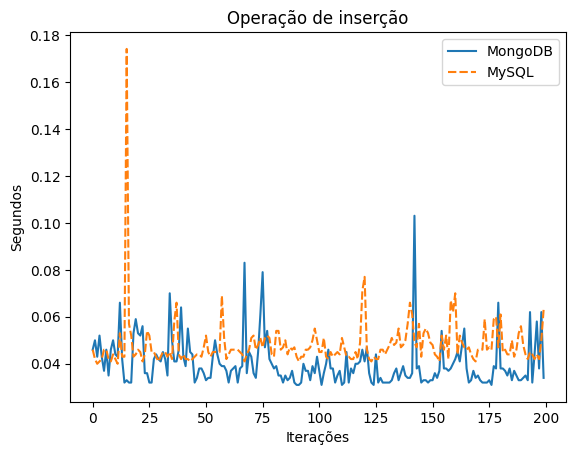

In [221]:
ax = sns.lineplot(data = df_Create)
ax.set_title('Operação de inserção')
ax.set(xlabel='Iterações', ylabel='Segundos')
plt.show()

**5.2) Operação de leitura**

In [222]:
df_Read = pd.DataFrame([])

In [223]:
df_Read['MongoDB'] = pd.DataFrame(np.array([listTotalTimeFindMongo]).T)

In [224]:
df_Read['MySQL'] = pd.DataFrame(np.array([listTotalTimeFindMySql]).T)

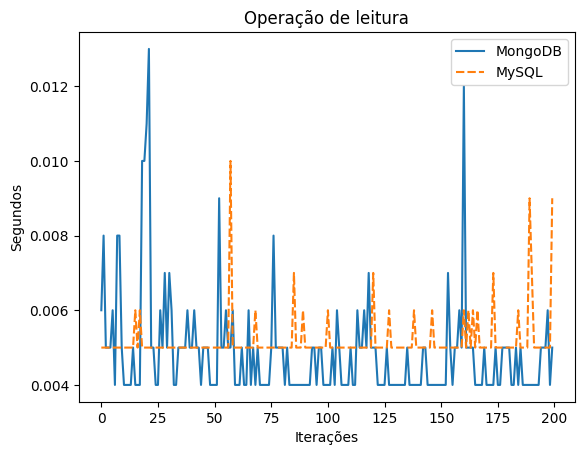

In [225]:
ax = sns.lineplot(data = df_Read)
ax.set_title('Operação de leitura')
ax.set(xlabel='Iterações', ylabel='Segundos')
plt.show()

**5.3) Operação de atualização**

In [226]:
df_Update = pd.DataFrame([])

In [227]:
df_Update['MongoDB'] = pd.DataFrame(np.array([listTotalTimeUpdateMongo]).T)

In [228]:
df_Update['MySQL'] = pd.DataFrame(np.array([listTotalTimeUpdateMySql]).T)

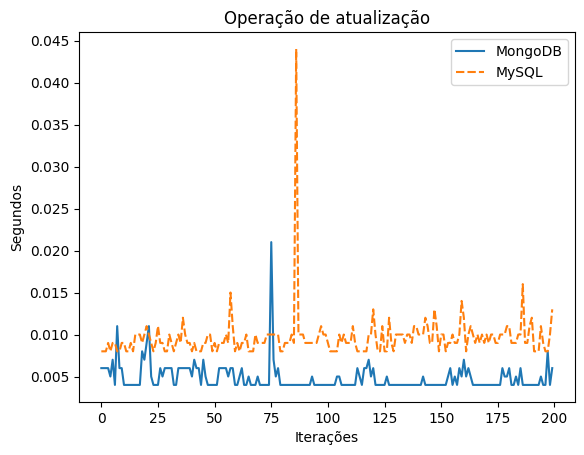

In [229]:
ax = sns.lineplot(data = df_Update)
ax.set_title('Operação de atualização')
ax.set(xlabel='Iterações', ylabel='Segundos')
plt.show()

**5.4) Operação de exclusão**

In [230]:
df_Delete = pd.DataFrame([])

In [231]:
df_Delete['MongoDB'] = pd.DataFrame(np.array([listTotalTimeDeleteMongo]).T)

In [232]:
df_Delete['MySQL'] = pd.DataFrame(np.array([listTotalTimeDeleteMySql]).T)

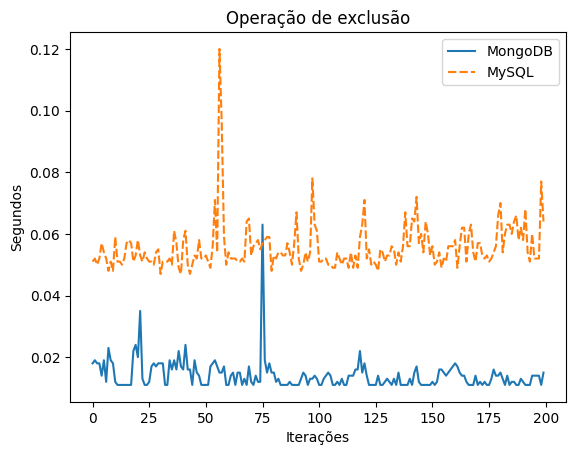

In [233]:
ax = sns.lineplot(data = df_Delete)
ax.set_title('Operação de exclusão')
ax.set(xlabel='Iterações', ylabel='Segundos')
plt.show()